<a href="https://colab.research.google.com/github/IvanKatorgin/Miscellaneous/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('data_hw_reg.xlsx')
df.head()

,date,country,confirmed,deaths
0,2020-01-22,Russia,0,0
1,2020-01-22,US,1,0
2,2020-01-23,Russia,0,0
3,2020-01-23,US,1,0
4,2020-01-24,Russia,0,0


In [ ]:
# формулирование выборок
df_1=df[df['country']=='Russia']
df_2=df[df['country']=='US']
print('Выборки имеют одинаковую длину: ', len(df_1)==len(df_2))

Выборки имеют одинаковую длину:  True


In [ ]:
# описательные статистики России
df_1.describe()

,confirmed,deaths
count,5.580000e+02,558.000000
mean,2.300445e+06,48404.983871
std,2.010516e+06,47780.244038
min,0.000000e+00,0.000000
25%,4.867282e+05,6188.000000
50%,1.528971e+06,26250.500000
75%,4.348391e+06,90858.000000
max,6.207513e+06,156726.000000


In [ ]:
# описательные статистики US
df_2.describe()

,confirmed,deaths
count,5.580000e+02,558.000000
mean,1.471734e+07,290682.942652
std,1.321288e+07,216562.312760
min,1.000000e+00,0.000000
25%,1.984974e+06,115109.250000
50%,8.767904e+06,227006.000000
75%,2.948581e+07,536045.000000
max,3.500342e+07,613228.000000


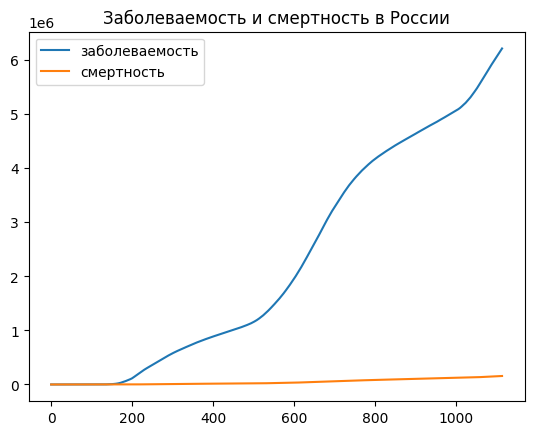

In [ ]:
# Визуализация динамик заболеваемости и смертности в России
plt.plot(df_1['confirmed'])
plt.plot(df_1['deaths'])
plt.title('Заболеваемость и смертность в России')
plt.legend(['заболеваемость', 'смертность'])
plt.show()

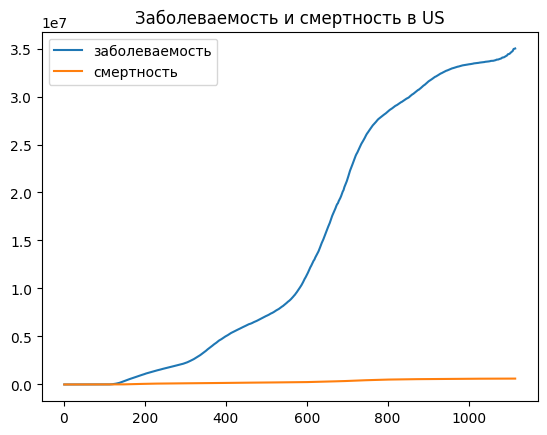

In [ ]:
# Визуализация динамик заболеваемости и смертности в US
plt.plot(df_2['confirmed'])
plt.plot(df_2['deaths'])
plt.title('Заболеваемость и смертность в US')
plt.legend(['заболеваемость', 'смертность'])
plt.show()

In [ ]:
df['confirmed'].corr(df['deaths']) # вычисление корреляции смертности от заболеваемости

0.9898359549904744

In [ ]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,confirmed,deaths
confirmed,1.000000,0.989836
deaths,0.989836,1.000000


In [ ]:
# матрица корреляции средствами pandas
df.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-10-c1582c79c505>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,confirmed,deaths
confirmed,1.000000,0.989836
deaths,0.989836,1.000000


<ipython-input-11-2f9cbbd13e2d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')


<Axes: >

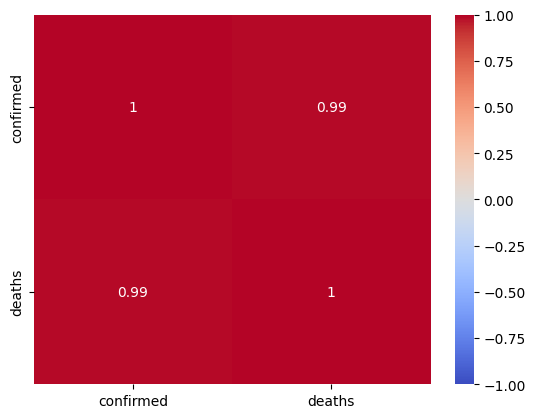

In [ ]:
# матрица корреляции средствами визуализации seaborn (тепловая матрица)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

Построение линейной регрессии для России

In [ ]:
# формирование выборок заболеваемости и смертности в России
x=df_1[['confirmed']]
y=df_1[['deaths']]

from sklearn.linear_model import LinearRegression # подключение модуля линейной регресси
regressor=LinearRegression()                      # инициализация линейной регресси
regressor.fit(x,y)                                # обучение линейной регрессии

# коэффициент прямой
a=regressor.intercept_
a
# коэффициент наклона прямой
b=regressor.coef_
b

Height_pred=25000000                              # значение роста для получения прогноза веса
regressor.predict([[Height_pred]])                # получене прогноза линейной регрессии

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[582420.3846451]])

In [ ]:
# получение прогноза "в лоб" по уравнению прямой регрессии a+bx
a+b*Height_pred

array([[582420.3846451]])

In [ ]:
# формирование выборок заболеваемости и смертности в US
x=df_2[['confirmed']]
y=df_2[['deaths']]

from sklearn.linear_model import LinearRegression # подключение модуля линейной регресси
regressor=LinearRegression()                      # инициализация линейной регресси
regressor.fit(x,y)                                # обучение линейной регрессии

# коэффициент прямой
a=regressor.intercept_
a
# коэффициент наклона прямой
b=regressor.coef_
b

Height_pred=25000000                              # значение роста для получения прогноза веса
regressor.predict([[Height_pred]])                # получене прогноза линейной регрессии

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[457745.59798565]])

In [ ]:
# получение прогноза "в лоб" по уравнению прямой регрессии a+bx
a+b*Height_pred

array([[457745.59798565]])

Выводы:
Заболеваемость и смертность явно коррелирует;
Заболеваемость и смертность растёт